## Autograd의 기초

- PyTorch의 Autograd 기능은 PyTorch를 기계 학습 프로젝트 구축을 위해 유연하고 빠르게 만드는 것의 일부입니다. 복잡한 계산을 통해 여러 편도함수( 그라디언트 라고도 함)를 빠르고 쉽게 계산할 수 있습니다 . 이 작업은 역전파 기반 신경망 학습의 핵심입니다.
- autograd의 힘은 런타임에 계산을 동적으로 추적한다는 사실에서 비롯됩니다 . 즉, 모델에 결정 분기 또는 런타임까지 길이를 알 수 없는 루프가 있는 경우 계산이 여전히 올바르게 추적되고 올바른 결과를 얻을 수 있습니다. 학습을 유도하는 그라디언트. 이는 모델이 Python으로 구축되었다는 사실과 결합되어 그라디언트 계산을 위해 보다 엄격하게 구조화된 모델의 정적 분석에 의존하는 프레임워크보다 훨씬 더 많은 유연성을 제공합니다.

### Autograd가 필요한 이유는 무엇입니까?

- 오토그라드는 다음과 같다. 그것은 모든 계산의 역사를 추적한다. PyTorch 모델의 모든 계산 텐서는 입력 텐서와 이를 만드는 데 사용된 함수의 이력을 가지고 있다.
- 각각 텐서에 작용하도록 의도된 파이토치 함수가 자체 도함수를 계산하기 위한 내장 구현을 가지고 있다는 사실과 결합하면 학습에 필요한 로컬 도함수의 계산 속도를 크게 높일 수 있다.

### A Simple Example

In [1]:
%matplotlib inline
import torch

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker 
import math

-  required_grad=True 이 플래그를 설정하는 것은 이어지는 모든 계산에서 autograd가 해당 계산의 출력 텐서에 계산 기록을 축적한다는 것을 의미한다.
- torch.linspace : 값이 처음부터 끝까지 균등하게 배치된 1차원 텐서를 작성합니다. 즉, 값은 다음과 같다.

In [2]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
print(a)

tensor([0.0000, 0.2618, 0.5236, 0.7854, 1.0472, 1.3090, 1.5708, 1.8326, 2.0944,
        2.3562, 2.6180, 2.8798, 3.1416, 3.4034, 3.6652, 3.9270, 4.1888, 4.4506,
        4.7124, 4.9742, 5.2360, 5.4978, 5.7596, 6.0214, 6.2832],
       requires_grad=True)


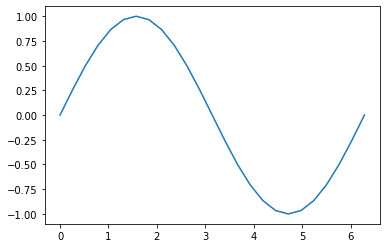

In [3]:
b = torch.sin(a)
plt.plot(a.detach(), b.detach())

- Tensor가 기록을 추적하는 것을 중단하게 하려면, .detach()를 호출하여 연산 기록으로부터 분리(detach)하여 이후 연산들이 추적되는 것을 방지할 수 있습니다.

- 이 grad_fn은 역전파 단계를 실행하고 기울기를 계산할 때, 이 텐서의 모든 입력에 대한 sin(x)의 미분(도함수)을 계산할 필요가 있다는 힌트를 준다.

In [5]:
c = 2 * b
print(c)

d = c + 1
print(d)

tensor([ 0.0000e+00,  5.1764e-01,  1.0000e+00,  1.4142e+00,  1.7321e+00,
         1.9319e+00,  2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,
         1.0000e+00,  5.1764e-01, -1.7485e-07, -5.1764e-01, -1.0000e+00,
        -1.4142e+00, -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00,
        -1.7321e+00, -1.4142e+00, -1.0000e+00, -5.1764e-01,  3.4969e-07],
       grad_fn=<MulBackward0>)
tensor([ 1.0000e+00,  1.5176e+00,  2.0000e+00,  2.4142e+00,  2.7321e+00,
         2.9319e+00,  3.0000e+00,  2.9319e+00,  2.7321e+00,  2.4142e+00,
         2.0000e+00,  1.5176e+00,  1.0000e+00,  4.8236e-01, -3.5763e-07,
        -4.1421e-01, -7.3205e-01, -9.3185e-01, -1.0000e+00, -9.3185e-01,
        -7.3205e-01, -4.1421e-01,  4.7684e-07,  4.8236e-01,  1.0000e+00],
       grad_fn=<AddBackward0>)


- 마지막으로 단일 요소 출력을 계산해 보겠습니다. 인수가 없는 텐서에서 .backward()를 호출할 때, 손실 함수를 계산할 때처럼 호출 텐서는 단일 요소만 포함할 것으로 예상한다.

In [6]:
out = d.sum()
print(out)

tensor(25., grad_fn=<SumBackward0>)


- 우리의 텐서와 함께 저장된 각각의 grad_fn은 당신이 그것의 next_functions 속성으로 그것의 입력까지 연산을 할 수 있게 해준다. 아래에서 볼 수 있듯이 d에서 이 속성을 드릴다운하면 모든 선행 텐서에 대한 그라데이션 함수를 볼 수 있습니다. a.grad_fn은 없음으로 보고되며, 이는 자체 이력이 없는 함수에 대한 입력임을 나타낸다.

In [7]:
print('d:')
print(d.grad_fn)
print(d.grad_fn.next_functions)
print(d.grad_fn.next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions)
print(d.grad_fn.next_functions[0][0].next_functions[0][0].next_functions[0][0].next_functions)
print('\nc:')
print(c.grad_fn)
print('\nb:')
print(b.grad_fn)
print('\na:')
print(a.grad_fn)

d:
((<MulBackward0 object at 0x7f966c346990>, 0), (None, 0))
((<SinBackward object at 0x7f966c3466d0>, 0), (None, 0))
((<AccumulateGrad object at 0x7f966c346b50>, 0),)
()

c:

b:

a:
None


- With all this machinery in place, how do we get derivatives out? You call the backward() method on the output, and check the input’s grad property to inspect the gradients:

tensor([ 2.0000e+00,  1.9319e+00,  1.7321e+00,  1.4142e+00,  1.0000e+00,
         5.1764e-01, -8.7423e-08, -5.1764e-01, -1.0000e+00, -1.4142e+00,
        -1.7321e+00, -1.9319e+00, -2.0000e+00, -1.9319e+00, -1.7321e+00,
        -1.4142e+00, -1.0000e+00, -5.1764e-01,  2.3850e-08,  5.1764e-01,
         1.0000e+00,  1.4142e+00,  1.7321e+00,  1.9319e+00,  2.0000e+00])


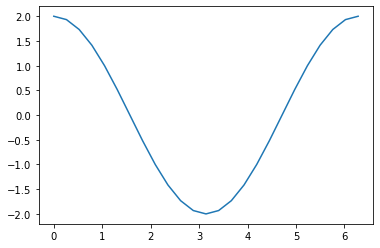

In [8]:
out.backward()
print(a.grad)
plt.plot(a.detach(), a.grad.detach())

In [9]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
b = torch.sin(a)
c = 2 * b
d = c + 1
out = d.sum()

In [10]:
out

tensor(25., grad_fn=<SumBackward0>)

- 계산의 리프 노드만 그레이디언트를 계산한다는 점에 유의하십시오. 예를 들어 인쇄(c.grad)를 시도하면 없음이 반환됩니다. 이 간단한 예에서는 입력만 리프 노드이므로, 입력만 그레이디언트가 계산된다

### Autograd in Training

- 오토그라드가 어떻게 작동하는지 간략히 살펴봤지만, 목적대로 사용되었을 때 어떻게 보일까요? 작은 모델을 정의하고 단일 교육 배치 후 어떻게 변화하는지 알아보겠습니다. 먼저 몇 가지 상수, 모델 및 입력 및 출력에 대한 몇 가지 대역을 정의합니다

In [11]:
BATCH_SIZE = 16
DIM_IN = 1000
HIDDEN_SIZE = 100
DIM_OUT = 10

class TinyModel(torch.nn.Module):

    def __init__(self):
        super(TinyModel, self).__init__()

        self.layer1 = torch.nn.Linear(1000, 100)
        self.relu = torch.nn.ReLU()
        self.layer2 = torch.nn.Linear(100, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

some_input = torch.randn(BATCH_SIZE, DIM_IN, requires_grad=False)
ideal_output = torch.randn(BATCH_SIZE, DIM_OUT, requires_grad=False)

model = TinyModel()

- One thing you might notice is that we never specify requires_grad=True for the model’s layers. Within a subclass of torch.nn.Module, it’s assumed that we want to track gradients on the layers’ weights for learning.
- 모델의 레이어를 살펴보면 가중치의 값을 검사하고 아직 그라디언트가 계산되지 않았 음을 확인할 수 있습니다.




In [12]:
print(model.layer2.weight[0][0:10]) # just a small slice
print(model.layer2.weight.grad)

tensor([-0.0981,  0.0572, -0.0513, -0.0210, -0.0861, -0.0190,  0.0889,  0.0679,
         0.0308, -0.0888], grad_fn=<SliceBackward>)
None


- 하나의 교육 배치를 실행해 볼 때 이것이 어떻게 변하는지 알아보겠습니다. 손실 함수에 대해서는 예측과 이상_출력 사이의 유클리드 거리의 제곱을 사용하고 기본적인 확률적 경사 강하 최적화 도구를 사용할 것이다.

In [13]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

prediction = model(some_input)

loss = (ideal_output - prediction).pow(2).sum()
print(loss)

tensor(150.4544, grad_fn=<SumBackward0>)


In [15]:
loss.backward()
print(model.layer2.weight[0][0:10])
print(model.layer2.weight.grad[0][0:10])

tensor([-0.0981,  0.0572, -0.0513, -0.0210, -0.0861, -0.0190,  0.0889,  0.0679,
         0.0308, -0.0888], grad_fn=<SliceBackward>)
tensor([ 4.2519, -2.7065,  0.2412, -2.9373,  0.0599,  3.8087,  3.0970,  0.5012,
        -0.8951,  4.3931])


- 각 학습 가중치에 대해 기울기가 계산되었지만 최적화 프로그램을 아직 실행하지 않았기 때문에 가중치는 변경되지 않았습니다. 최적화 도구는 계산된 그라데이션에 따라 모델 가중치를 업데이트하는 역할을 합니다.

In [16]:
print(model.layer2.weight.grad[0][0:10])

for i in range(0, 5):
    prediction = model(some_input)
    loss = (ideal_output - prediction).pow(2).sum()
    loss.backward()

print(model.layer2.weight.grad[0][0:10])

optimizer.zero_grad()

print(model.layer2.weight.grad[0][0:10])

tensor([ 4.2519, -2.7065,  0.2412, -2.9373,  0.0599,  3.8087,  3.0970,  0.5012,
        -0.8951,  4.3931])
tensor([ 25.5115, -16.2392,   1.4469, -17.6239,   0.3594,  22.8524,  18.5821,
          3.0074,  -5.3706,  26.3588])
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


- 위의 셀을 실행한 후, loss.backward()를 여러 번 실행하면 대부분의 그라데이션의 크기가 훨씬 커집니다. 다음 교육 배치를 실행하기 전에 그레이디언트를 0으로 설정하지 않으면 그레이디언트가 이러한 방식으로 폭발하여 부정확하고 예측 불가능한 학습 결과가 초래됩니다.

### Turning Autograd Off and On

- autograd 활성화 여부를 세부적으로 제어해야 하는 경우가 있습니다. 이렇게 하는 방법은 상황에 따라 여러 가지가 있습니다. 가장 간단한 방법은 텐서 상의 required_grad 플래그를 직접 변경하는 것이다.

In [17]:
a = torch.ones(2, 3, requires_grad=True)
print(a)

b1 = 2 * a
print(b1)

a.requires_grad = False
b2 = 2 * a
print(b2)

tensor([[1., 1., 1.],
        [1., 1., 1.]], requires_grad=True)
tensor([[2., 2., 2.],
        [2., 2., 2.]], grad_fn=<MulBackward0>)
tensor([[2., 2., 2.],
        [2., 2., 2.]])


- 위의 셀에서, 우리는 b1이 grad_fn (즉, 추적된 계산 이력)을 갖는 것을 볼 수 있는데, 이것은 오토그라드가 켜진 텐서 a로부터 파생되었기 때문에 우리가 예상하는 것이다. a.requires_grad = False로 명시적으로 autograd를 끄면, b2를 계산할 때 볼 수 있듯이 계산 내역이 더 이상 추적되지 않는다.

- autograd를 일시적으로만 해제해야 하는 경우 torch.no_gradp를 사용하는 것이 더 나은 방법입니다.


In [18]:
a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = a + b
print(c1)

with torch.no_grad():
    c2 = a + b

print(c2)

c3 = a * b
print(c3)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])
tensor([[6., 6., 6.],
        [6., 6., 6.]], grad_fn=<MulBackward0>)


- torch.no_grad() can also be used as a function or method dectorator:

In [19]:
def add_tensors1(x, y):
    return x + y

@torch.no_grad()
def add_tensors2(x, y):
    return x + y


a = torch.ones(2, 3, requires_grad=True) * 2
b = torch.ones(2, 3, requires_grad=True) * 3

c1 = add_tensors1(a, b)
print(c1)

c2 = add_tensors2(a, b)
print(c2)

tensor([[5., 5., 5.],
        [5., 5., 5.]], grad_fn=<AddBackward0>)
tensor([[5., 5., 5.],
        [5., 5., 5.]])


- There’s a corresponding context manager, torch.enable_grad(), for turning autograd on when it isn’t already. It may also be used as a decorator.

- 마지막으로, 그라데이션 추적이 필요한 텐서가 있을 수 있지만 그렇지 않은 복사본을 원할 수 있습니다. 이를 위해 텐서 객체의 분리() 방법이 있다 - 계산 이력에서 분리된 텐서의 사본을 만든다:

In [20]:
x = torch.rand(5, requires_grad=True)
y = x.detach()

print(x)
print(y)

tensor([0.0129, 0.2872, 0.9309, 0.0081, 0.0394], requires_grad=True)
tensor([0.0129, 0.2872, 0.9309, 0.0081, 0.0394])


- 위에서 텐서 몇 개를 그래프로 표시하려고 했습니다. 이는 matplotlib이 입력으로 NumPy 배열을 기대하며, required_grad=True인 텐서에 대해서는 PyTorch 텐서에서 NumPy 배열로의 암시적 변환이 활성화되지 않기 때문이다. 분리된 사본을 만드는 것은 우리가 앞으로 나아갈 수 있게 해줍니다.

### Autograd and In-place Operations

-  지금까지 이 노트북의 모든 예에서 변수를 사용하여 계산의 중간 값을 캡처했습니다. 오토그라드는 기울기 계산을 수행하기 위해 이러한 중간 값이 필요하다. 따라서 autograd를 사용할 때 인플레이스 작업을 사용할 때 주의해야 합니다.
- 그렇게 하면 역방향 호출에서 도함수를 계산하는 데 필요한 정보가 파괴될 수 있습니다. PyTorch는 당신이 아래와 같이 autograd를 필요로 하는 leaf 변수에서 in-place 연산을 시도해도 당신을 정지시킬 것이다.

In [21]:
a = torch.linspace(0., 2. * math.pi, steps=25, requires_grad=True)
torch.sin_(a)

RuntimeError: a leaf Variable that requires grad is being used in an in-place operation.

### Autograd Profiler
- https://pytorch.org/tutorials/beginner/introyt/autogradyt_tutorial.html

- Autograd는 계산의 모든 단계를 자세히 추적합니다. 이러한 계산 히스토리와 타이밍 정보가 결합되면 유용한 프로파일러가 될 수 있으며, 오토그라드에는 그러한 기능이 내장되어 있다. 다음은 간단한 사용 예입니다.

In [23]:
device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
    device = torch.device('cuda:1')
    run_on_gpu = True
    
x = torch.randn(2, 3, requires_grad=True)
y = torch.rand(2, 3, requires_grad=True)
z = torch.ones(2, 3, requires_grad=True)

with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
    for _ in range(1000):
        z = ( z / x ) * y

print(prf.key_averages().table(sort_by='self_cpu_time_total'))

---------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
           Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg    # of Calls  
---------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
      aten::div        50.52%      13.693ms        52.92%      14.344ms      14.344us      13.906ms        53.05%      13.906ms      13.906us          1000  
      aten::mul        44.73%      12.124ms        47.08%      12.762ms      12.762us      12.307ms        46.95%      12.307ms      12.307us          1000  
    aten::empty         4.75%       1.288ms         4.75%       1.288ms       0.644us       0.000us         0.00%       0.000us       0.000us          2000  
---------------  ------------  ------------  ------

In [24]:
device = torch.device('cpu')
run_on_gpu = False
if torch.cuda.is_available():
    device = torch.device('cuda:0')
    run_on_gpu = True
    
x = torch.randn(2, 3, requires_grad=True)
y = torch.rand(2, 3, requires_grad=True)
z = torch.ones(2, 3, requires_grad=True)

with torch.autograd.profiler.profile(use_cuda=run_on_gpu) as prf:
    for _ in range(1000):
        z = ( z / x ) * y

print(prf.key_averages().table(sort_by='self_cpu_time_total'))

---------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
           Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg     Self CUDA   Self CUDA %    CUDA total  CUDA time avg    # of Calls  
---------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
      aten::mul        47.76%      13.486ms        50.30%      14.203ms      14.203us      13.834ms        50.26%      13.834ms      13.834us          1000  
      aten::div        47.09%      13.297ms        49.70%      14.035ms      14.035us      13.692ms        49.74%      13.692ms      13.692us          1000  
    aten::empty         5.15%       1.455ms         5.15%       1.455ms       0.728us       0.000us         0.00%       0.000us       0.000us          2000  
---------------  ------------  ------------  ------

### Advanced Topic: More Autograd Detail and the High-Level API

- If you have a function with an n-dimensional input and m-dimensional output, \vec{y}=f(\vec{x}) 
y
​
 =f( 
x
 ), the complete gradient is a matrix of the derivative of every output with respect to every input, called the Jacobian:
- n차원 입력과 m차원 출력을 갖는 함수를 갖는다면, {vec{y}=f({vec}x}) y =f( x ), 완전한 그라디언트는 Jacobian이라고 불리는 모든 입력에 대한 모든 출력의 미분 행렬입니다.
- 좀 더 구체적으로, 첫 번째 함수를 파이토치 모델(잠재적으로 많은 입력과 출력을 가진)로, 두 번째 함수를 손실 함수(모델의 출력을 입력으로, 손실 값을 스칼라 출력으로)로 가정하자.
- 이러한 이유로, 백워드() 호출은 선택적 벡터 입력을 취할 수도 있다. 이 벡터는 텐서 위의 그레이디언트 집합을 나타내며, 그 앞에 오는 오토그라드 추적 텐서의 야코비안으로 곱한다. 작은 벡터로 구체적인 예를 들어보자.

In [25]:
x = torch.randn(3, requires_grad=True)

y = x * 2
while y.data.norm() < 1000:
    y = y * 2

print(y)

tensor([-970.0334,  418.4893,  -44.0985], grad_fn=<MulBackward0>)


- 지금 y.backward()를 호출하면 런타임 오류가 발생하고 스칼라 출력에 대해서만 그라디언트를 암시 적으로 계산할 수 있다는 메시지가 표시됩니다. 다차원 출력의 경우, autograd는 Jacobian으로 곱할 수 있는 세 가지 출력에 대해 그라디언트를 제공할 것으로 기대합니다.


In [26]:
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float) # stand-in for gradients
y.backward(v)

print(x.grad)

tensor([5.1200e+01, 5.1200e+02, 5.1200e-02])


### The High-Level API

- 중요한 미분 행렬 및 벡터 연산에 직접 액세스할 수 있는 API가 autograd에 있습니다. 특히 특정 입력에 대한 특정 함수의 야코비 행렬과 헤시안 행렬을 계산할 수 있습니다. (헤시안은 야코비안과 유사하지만, 모든 부분적인 이차 도함수를 표현한다.) 또한 이러한 행렬과 함께 벡터 곱을 취하는 방법을 제공합니다.

- 2개의 단일 원소 입력에 대해 평가되는 단순 함수의 야코비안을 구해보자.

In [27]:
def exp_adder(x, y):
    return 2 * x.exp() + 3 * y

inputs = (torch.rand(1), torch.rand(1)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.2675]), tensor([0.6201]))


(tensor([[2.6133]]), tensor([[3.]]))

In [28]:
inputs = (torch.rand(3), torch.rand(3)) # arguments for the function
print(inputs)
torch.autograd.functional.jacobian(exp_adder, inputs)

(tensor([0.2389, 0.3015, 0.0572]), tensor([0.9067, 0.7062, 0.0331]))


(tensor([[2.5398, 0.0000, 0.0000],
         [0.0000, 2.7039, 0.0000],
         [0.0000, 0.0000, 2.1177]]),
 tensor([[3., 0., 0.],
         [0., 3., 0.],
         [0., 0., 3.]]))

- The torch.autograd.functional.hessian() method works identically (assuming your function is twice differentiable), but returns a matrix of all second derivatives.

- 벡터를 제공하면 벡터-야코비아 곱을 직접 계산하는 함수도 있다.

In [30]:
def do_some_doubling(x):
    y = x * 2
    while y.data.norm() < 1000:
        y = y * 2
    return y

inputs = torch.randn(3)
my_gradients = torch.tensor([0.1, 1.0, 0.0001])
torch.autograd.functional.vjp(do_some_doubling, inputs, v=my_gradients)

(tensor([ 869.1605, -945.6362, -572.6524]),
 tensor([4.0960e+02, 4.0960e+03, 4.0960e-01]))